# Data Profiling - OTX Alient Vault - ip addresses

In [1]:
import datetime
import os
import time
import pandas as pd 
import requests
import urllib3
import json
import sys
import numpy as np

pd.options.display.max_colwidth = 1000
pd.set_option('display.max_columns', None)

In [2]:
file = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\DataCollection\OTXAlienVault\Domain.csv'

In [3]:
df = pd.read_csv(file, low_memory = False )
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,0,1692293883,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,1,1691745243,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,2,1694887902,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,3,1695694634,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,4,1695214458,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...,...
1767,1767,1654802472,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,1768,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,1769,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,1770,1685216321,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


In [4]:

df = df.drop('Unnamed: 0', axis=1)
df

,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,1692293883,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,1691745243,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,1694887902,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,1695694634,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,1695214458,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...
1767,1654802472,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,1685216321,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


In [5]:
print("Duplicates: ",df.duplicated().any())
#total number of not null values
not_null_values = df.count().sum()
print("# not null values: ",not_null_values)
#total number of null values
null_values = df.isnull().sum().sum()
print("# null values: ",null_values)
#total number of cells
n_values = df.shape[0]*df.shape[1]
print("# values: ",n_values)
#we added to the set of missing values also 'na' and '--'
missing_values = ['na','--', 'NaN']
ds_property_nan = pd.read_csv(file, na_values = missing_values)
print("# missings: ",ds_property_nan.isnull().sum().sum())

Duplicates:  False
# not null values:  9773
# null values:  4403
# values:  14176
# missings:  4403


## Completeness

In [6]:
#COMPLETENESS evaluation
completeness = not_null_values / n_values
completeness = '{0:.1f}%'.format(completeness*100)
print(completeness)

68.9%


In [7]:
df


,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,1692293883,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,1691745243,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,1694887902,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,1695694634,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,1695214458,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...
1767,1654802472,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,1685216321,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


## Timeliness

In [8]:
from datetime import datetime

temp_columns = ['datetime_int']

df['datetime_int'] = pd.to_datetime(df['datetime_int'], unit='s')

df

,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,2023-08-17 17:38:03,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,2023-08-11 09:14:03,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,2023-09-16 18:11:42,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,2023-09-26 02:17:14,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,2023-09-20 12:54:18,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...
1767,2022-06-09 19:21:12,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,2022-10-12 10:10:46,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,2022-10-12 10:10:46,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,2023-05-27 19:38:41,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


In [9]:
dateparse = lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
ds_property_t = df

volatility = 20
today = datetime(2023, 9, 15)
ds_property_t['currency'] = (today-ds_property_t['datetime_int']).dt.days

#adding a column with the timeliness computation
#if volatility is greater than currency the timeliness is equal to 1-currency/volatility, otherwise is 0
ds_property_t['Timeliness'] = np.where(volatility>ds_property_t['currency'],
                                       1-(ds_property_t['currency']/volatility),
                                       0)

print("Average Timeliness: ", ds_property_t['Timeliness'].mean())
print("Maximum Timeliness:", ds_property_t['Timeliness'].max())
print("Minimum Timeliness:", ds_property_t['Timeliness'].min())

Average Timeliness:  0.0688769751693002
Maximum Timeliness: 2.55
Minimum Timeliness: 0.0


# 10.1. Data Profiling - source OTX Alien Vault

In the single column analysis are analysed the following columns:
- 'datetime_int'
- 'hash'
- 'date'
- 'detections.avast'
- 'detections.avg'
- 'detections.clamav'
- 'detections.msdefender'
- 'domain'

## Single column analysis

In [14]:
file = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\DataCollection\OTXAlienVault\Domain.csv'

In [15]:
df = pd.read_csv(file, low_memory = False )
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,0,1692293883,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,1,1691745243,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,2,1694887902,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,3,1695694634,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,4,1695214458,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...,...
1767,1767,1654802472,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,1768,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,1769,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,1770,1685216321,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


In [16]:
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain
0,0,1692293883,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,2023-08-17T17:38:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top
1,1,1691745243,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,2023-08-11T09:14:03,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top
2,2,1694887902,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,2023-09-16T18:11:42,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org
3,3,1695694634,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,2023-09-26T02:17:14,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org
4,4,1695214458,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,2023-09-20T12:54:18,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org
...,...,...,...,...,...,...,...,...,...
1767,1767,1654802472,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,2022-06-09T19:21:12,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net
1768,1768,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh17.com
1769,1769,1665569446,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,2022-10-12T10:10:46,NaN,NaN,NaN,NaN,pkvithtosh11.com
1770,1770,1685216321,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,2023-05-27T19:38:41,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug


In [17]:
df = df.drop(['Unnamed: 0', 'date'], axis=1)
df['date'] = pd.to_datetime(df['datetime_int'], unit='s')
df = df.drop('datetime_int', axis=1)

df

,hash,detections.avast,detections.avg,detections.clamav,detections.msdefender,domain,date
0,0466d098c4beb3177c544801235119985f13eceebaa61405088f6fcd24fd6e96,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,gr.treef.top,2023-08-17 17:38:03
1,93a6da3e99aa31bef56be969ef66df9ae5aa2a3f7c744fa977486d78384c4de9,NaN,NaN,Win.Trojan.Redline-9938775-1,NaN,no.pleaz.top,2023-08-11 09:14:03
2,3d5aa422a120da634ebad364a3af6cee0be02a23210cec73bf692bbee545d472,NaN,NaN,NaN,ALF:HeraklezEval:Trojan:MSIL/AgentTesla.AR!rfn,thecookieisthere.duckdns.org,2023-09-16 18:11:42
3,53efa0ea3650452f5808cd2980b3ea7e0e3038ea283905355b406de8db6844de,NaN,NaN,Win.Trojan.NanoCore-9852758-0,Backdoor:MSIL/Nanocore.S!MTB,xdanetnow.duckdns.org,2023-09-26 02:17:14
4,659e11b099e01bd11e0e708e2e6cb9faf762eb1efd4b343b48f41a126d618f6a,NaN,NaN,Win.Trojan.Agent-6509946-0,NaN,silentlegion.duckdns.org,2023-09-20 12:54:18
...,...,...,...,...,...,...,...
1767,87b05c7108251ef607d1b9bd1d717824c6a93d608e58d8e9553e403fa81e5ed9,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,presh147osidufhj.ddns.net,2022-06-09 19:21:12
1768,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,NaN,NaN,NaN,NaN,pkvithtosh17.com,2022-10-12 10:10:46
1769,a6b33cbfee592d34c4773d04ff1d3a06bc99d192db31bd1074a81ce25bdd049e,NaN,NaN,NaN,NaN,pkvithtosh11.com,2022-10-12 10:10:46
1770,d6aaa66ca79bc49452a184140f4f08c324f84f38a3087dac3e44b67d426c15a9,NaN,NaN,NaN,ALF:HeraklezEval:HackTool:Win32/DefenderControl,ekb.tuktuk.ug,2023-05-27 19:38:41


In [18]:
df.columns

Index(['hash', 'detections.avast', 'detections.avg', 'detections.clamav',
       'detections.msdefender', 'domain', 'date'],
      dtype='object')

# Single column analysis

# 1 : hash

## CARDINALITIES

In [19]:
#len command counts the number of rows
n_rows = len(df['hash'])
print("# rows: ", n_rows)

# rows:  1772


In [20]:
#number of non—null observation in "ioc" column
count_values = df['hash'].count()
print("# non-null: ", n_rows)

# non-null:  1772


In [21]:
#value counts is the same of a group by (attribute "ibu")
df['hash'].value_counts()

9732ed12f909745aedff7c75643e156d11de046b3db1987f300449412e973f89    13
3f520e0a8ffa27ee066b08e9827fd7e7a848e99bee62a44b7532f96d637c2929     9
3c4f842572c41aa3a1c474baccc73e1de3bdcfb0b7652b2b62c08aa5b13cf13f     8
782c142610642e1fe3cfec4ee2ebfb717801d4ca0a6438bac1f6938e41d61a27     6
c536b84ee17abfc596058bf5aca74f161cc372669760aba80804d497bb256bfa     6
                                                                    ..
970cf7ed1c1fc09972f2685005ab0495b15918a2b24376a36b0f35182bd98b07     1
c5dd2e887738115a942ce9817aeaff1a05de505db1897403214baa624722e9ee     1
f4dcc52b899bbe0d34ffbb44032c0186953c174beaf647c0556c7e71385c6bb4     1
0afd6d772b09767847f0635c5e1e56d51ab97997bcd5cf82701f2159195065e7     1
9ddfefb536babc1938301bde712e14676e3644dfe2344e9dd67063a493a3e907     1
Name: hash, Length: 1586, dtype: int64

## Cardinality

In [22]:
#nunique is the number of distict values for an attribute (attribute "ibu")
distinct_values = (df['hash'].nunique())
print("Cardinality: ", distinct_values)

Cardinality:  1586


## Uniqueness

In [23]:
#Uniqueness evaluation (attribute "ioc")
uniqueness = distinct_values / n_rows
print("Uniqueness: ", uniqueness)

Uniqueness:  0.8950338600451467


## Distinctness

In [24]:
#Distinctness evaluation (attribute "ioc")
distinctness = distinct_values / count_values
print("Distinctness: ", distinctness)

Distinctness:  0.8950338600451467


# 2 : domains


## CARDINALITIES


In [27]:
col = 'domain'

In [28]:
n_rows = len(df[col])
print("# rows: ", n_rows)

# rows:  1772


In [29]:
count_values = df[col].count()
print("# non-null: ", n_rows)

# non-null:  1772


In [30]:
df[col].value_counts()

gr.treef.top                  1
mendey.duckdns.org            1
dftyuj.duckdns.org            1
microsoftdell5.duckdns.org    1
asdghn.duckdns.org            1
                             ..
angelista23.duckdns.org       1
tehilaproj.hopto.org          1
tokia7823.duckdns.org         1
mercyandgrace.duckdns.org     1
srk.stracer.top               1
Name: domain, Length: 1772, dtype: int64

## Cardinality

In [31]:
distinct_values = (df[col].nunique())
print("Cardinality: ", distinct_values)

Cardinality:  1772


## Uniqueness

In [32]:
uniqueness = distinct_values / n_rows
print("Uniqueness: ", uniqueness)

Uniqueness:  1.0


## Distinctness

In [33]:
distinctness = distinct_values / count_values
print("Distinctness: ", distinctness)

Distinctness:  1.0


# Profiling Auto-report

In [34]:
sys.path.append("C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Report")

In [36]:
import pandas_profiling as pp

C:\Users\leona\AppData\Local\Temp\ipykernel_15304\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [37]:
profile = pp.ProfileReport(df, title="OTX Alien Vault - Domains - Pandas Profiling Report")
profile.to_file("OTX_Alien_Vault-Domains.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Value Distribution over time

In [40]:
import matplotlib.pyplot as plt

In [41]:
df = df.sort_values(by='date', ascending = True)

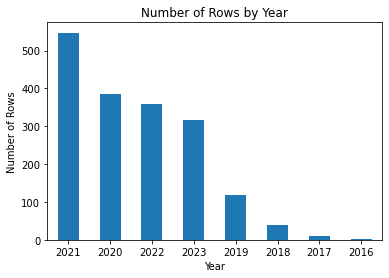

In [42]:
# Extract years from the 'date' column and create a histogram
years_histogram = df['date'].dt.year.value_counts()

# Plot the histogram
years_histogram.plot(kind='bar', xlabel='Year', ylabel='Number of Rows', title='Number of Rows by Year')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()